# Text Classification 


In this projet I will demonstrate:
1. Text data preparation (e.g., collecting)
2. Text data preprocessing (e.g., cleaning, transformation, TFIDF): Feature engineering
3. Training and testing supervised machine learning algorithms (e.g., Naïve Bayes) for text classification → Building predictive models for text mining
4. Evaluation of predictive model (e.g., accuracy, ROC curve, true positive rate)
5. Interpreting the results of your predictive models and discuss technical and managerial implications

##### First thing first, load all the necessary libraries:
##### Libraries for dataset preparation, feature engineering, model training 

In [1]:
%matplotlib inline
import nltk
import matplotlib.pyplot as plt
import csv
import pandas as pd
import sklearn
import numpy as np
from collections import Counter

# import nltk (natural language tool kit), a popular python package for text mining
import nltk
# stopwords, FreqDist, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from pattern.en import sentiment
from textblob import TextBlob 
# sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#regular expression
import re

# feature engineering (words to vectors)
from sklearn.feature_extraction.text import TfidfVectorizer

# classification algorithms (or classifiers)
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

# build a pipeline
from sklearn.pipeline import Pipeline

# model evaluation, validation
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve

#pip install scikit-plot 
import scikitplot as skplt

# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from lxml import html
import csv

#### First data collection and preparation.

#####  Data Acquisition

-web crawler on https://www.hrdive.com/?page=1.

In [9]:
# Web crawler
web = "https://www.hrdive.com/?page=%s"

for page in range(1,500,50):
    print(web % page)

https://www.hrdive.com/?page=1
https://www.hrdive.com/?page=51
https://www.hrdive.com/?page=101
https://www.hrdive.com/?page=151
https://www.hrdive.com/?page=201
https://www.hrdive.com/?page=251
https://www.hrdive.com/?page=301
https://www.hrdive.com/?page=351
https://www.hrdive.com/?page=401
https://www.hrdive.com/?page=451


In [10]:
alldata =[]

web = "https://www.hrdive.com/?page=%s"

for page in range(1,500,50):
    url = web % page
    data = html.fromstring(requests.get(url).text)
    #xpath
    for i in data.xpath("//li[contains(@class,'row feed__item')]/div[2][@class='medium-8 columns ']"):
        title = i.xpath('..//div[2]/h3/a/text()')
        print(title)
        alldata.append([title])
    
len(alldata)

['\n                                    \n                                    Large employers expand leave, payments amid coronavirus\n                                ']
['\n                                    \n                                    PayScale: Overall gender pay gap shrinks, but slightly\n                                ']
['\n                                    \n                                    Yes, that meeting could have been an email\n                                ']
['\n                                    \n                                    CVS eyes virtual interviews, job fairs to hire 50K workers\n                                ']
['\n                                    \n                                    EEOC: Manufacturer violated ADA in firing worker returning from hospitalization\n                                ']
['\n                                    \n                                    Employees confident they can do their jobs effectively from

250

In [11]:
finaldata=[]
web = "https://www.hrdive.com/?page=%s"
for page in range(1,500,50):
    url = web % page
    data = html.fromstring(requests.get(url).text)
    #xpath
    for i in data.xpath("//li[contains(@class,'row feed__item')]/div[2][@class='medium-8 columns ']"):
        title = i.xpath('..//div[2]/h3/a/text()')  
        print(title)
        alldata.append([title])
        
len(finaldata)

['\n                                    \n                                    Large employers expand leave, payments amid coronavirus\n                                ']
['\n                                    \n                                    PayScale: Overall gender pay gap shrinks, but slightly\n                                ']
['\n                                    \n                                    Yes, that meeting could have been an email\n                                ']
['\n                                    \n                                    CVS eyes virtual interviews, job fairs to hire 50K workers\n                                ']
['\n                                    \n                                    EEOC: Manufacturer violated ADA in firing worker returning from hospitalization\n                                ']
['\n                                    \n                                    Employees confident they can do their jobs effectively from

0

In [12]:
# convert list to data frame (excel-like)
pd.set_option('display.max_colwidth', -1)
df = pd.DataFrame(alldata)
df.head()

,0
0,"[\n \n Large employers expand leave, payments amid coronavirus\n ]"
1,"[\n \n PayScale: Overall gender pay gap shrinks, but slightly\n ]"
2,"[\n \n Yes, that meeting could have been an email\n ]"
3,"[\n \n CVS eyes virtual interviews, job fairs to hire 50K workers\n ]"
4,[\n \n EEOC: Manufacturer violated ADA in firing worker returning from hospitalization\n ]


##### Data preparation

In [13]:
# You could convert your list to str with astype(str) and then remove ', [, ] characters
# https://stackoverflow.com/questions/37347725/converting-a-panda-df-list-into-a-string/37347837

df[0] = df[0].astype(str).str.replace('\[|\]', '')
df

,0
0,"'\n \n Large employers expand leave, payments amid coronavirus\n '"
1,"'\n \n PayScale: Overall gender pay gap shrinks, but slightly\n '"
2,"'\n \n Yes, that meeting could have been an email\n '"
3,"'\n \n CVS eyes virtual interviews, job fairs to hire 50K workers\n '"
4,'\n \n EEOC: Manufacturer violated ADA in firing worker returning from hospitalization\n '
...,...
495,'\n \n Physical health conditions may be job-seeking barriers for those with serious mental illnesses\n '
496,'\n \n Back to Basics: An OSHA overview\n '
497,"'\n \n SUNY official fired over performance, not sexual orientation, 2nd Cir. says\n '"
498,'\n \n Walmart to hire 150K hourly employees\n '


##### Data cleaning & transformation

In [14]:
#https://stackoverflow.com/questions/37160929/how-to-remove-carriage-return-in-a-dataframe
# r --> regular expression

df[0] = df[0].str.replace(r'\\n',' ')
df

,0
0,"' Large employers expand leave, payments amid coronavirus '"
1,"' PayScale: Overall gender pay gap shrinks, but slightly '"
2,"' Yes, that meeting could have been an email '"
3,"' CVS eyes virtual interviews, job fairs to hire 50K workers '"
4,' EEOC: Manufacturer violated ADA in firing worker returning from hospitalization '
...,...
495,' Physical health conditions may be job-seeking barriers for those with serious mental illnesses '
496,' Back to Basics: An OSHA overview '
497,"' SUNY official fired over performance, not sexual orientation, 2nd Cir. says '"
498,' Walmart to hire 150K hourly employees '


In [15]:
# they only occur at start and end...
df[0] = df[0].str.replace('"', '')
df

,0
0,"' Large employers expand leave, payments amid coronavirus '"
1,"' PayScale: Overall gender pay gap shrinks, but slightly '"
2,"' Yes, that meeting could have been an email '"
3,"' CVS eyes virtual interviews, job fairs to hire 50K workers '"
4,' EEOC: Manufacturer violated ADA in firing worker returning from hospitalization '
...,...
495,' Physical health conditions may be job-seeking barriers for those with serious mental illnesses '
496,' Back to Basics: An OSHA overview '
497,"' SUNY official fired over performance, not sexual orientation, 2nd Cir. says '"
498,' Walmart to hire 150K hourly employees '


In [16]:
# they only occur at start and end...
df[0] = df[0].str.replace('"', '')
df

,0
0,"' Large employers expand leave, payments amid coronavirus '"
1,"' PayScale: Overall gender pay gap shrinks, but slightly '"
2,"' Yes, that meeting could have been an email '"
3,"' CVS eyes virtual interviews, job fairs to hire 50K workers '"
4,' EEOC: Manufacturer violated ADA in firing worker returning from hospitalization '
...,...
495,' Physical health conditions may be job-seeking barriers for those with serious mental illnesses '
496,' Back to Basics: An OSHA overview '
497,"' SUNY official fired over performance, not sexual orientation, 2nd Cir. says '"
498,' Walmart to hire 150K hourly employees '


In [17]:
df[0] = df[0].str.strip()
df

,0
0,"' Large employers expand leave, payments amid coronavirus '"
1,"' PayScale: Overall gender pay gap shrinks, but slightly '"
2,"' Yes, that meeting could have been an email '"
3,"' CVS eyes virtual interviews, job fairs to hire 50K workers '"
4,' EEOC: Manufacturer violated ADA in firing worker returning from hospitalization '
...,...
495,' Physical health conditions may be job-seeking barriers for those with serious mental illnesses '
496,' Back to Basics: An OSHA overview '
497,"' SUNY official fired over performance, not sexual orientation, 2nd Cir. says '"
498,' Walmart to hire 150K hourly employees '


In [18]:
#remove quotes
df[0] = df[0].str.replace(r'\'','')
df

,0
0,"Large employers expand leave, payments amid coronavirus"
1,"PayScale: Overall gender pay gap shrinks, but slightly"
2,"Yes, that meeting could have been an email"
3,"CVS eyes virtual interviews, job fairs to hire 50K workers"
4,EEOC: Manufacturer violated ADA in firing worker returning from hospitalization
...,...
495,Physical health conditions may be job-seeking barriers for those with serious mental illnesses
496,Back to Basics: An OSHA overview
497,"SUNY official fired over performance, not sexual orientation, 2nd Cir. says"
498,Walmart to hire 150K hourly employees


#### Merge two dataframes using append()

In [19]:
# convert to dataframe
# to view entire column
pd.set_option('display.max_colwidth', -1)
df1 = pd.read_csv('..//TextClassification/haf.csv', encoding = "ISO-8859-1",header=None) 
df1.head(2)

,0
0,"CVS eyes virtual interviews, job fairs to hire 50K workers"
1,EEOC: Manufacturer violated ADA in firing worker returning from hospitalization


#### HR-related news articles from hrdive

In [20]:
# change the name of a single column
df1['0'] = "1"
df1

,0,0
0,"CVS eyes virtual interviews, job fairs to hire 50K workers",1
1,EEOC: Manufacturer violated ADA in firing worker returning from hospitalization,1
2,Employees confident they can do their jobs effectively from home during COVID-19 pandemic,1
3,"Court revives coachs suit, citing need to consider the overall likelihood of discrimination",1
4,From manufacturing to HR: One womans journey through Honda,1
...,...,...
495,Walmart to hire 150K hourly employees,1
496,Are CEOs displacing CHROs in the workplace transformation?,1
497,9th Cir.: City electrician with record of insubordination failed to show bias,1
498,Coronavirus: Companies sitting ducks for breaches without IT security for telework,1


#### Non-HR data source (e.g., movie reviews from IMDB.com.

In [21]:
df2 = pd.read_csv('..//TextClassification/haa.csv', encoding = "ISO-8859-1",header=None) 
df2.head(2)

0
0  films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . in other words , don't dismiss this film because of its source . if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . getting the hughes brothers to direct this seems almost as ludicrous as casting carrot top in , well , anything , but riddle me this : who better to direct a film that's set in the ghetto and features really violent street crime than the mad geniuses behind menace ii society ? the ghetto in question is , of course , whitechapel in 1888 london's east end . it's a filthy , sooty place where the whores ( called " unfortunates " ) are starting to get a little nervous about this mysterious psychopath who has been carving through their profession with surgical precision . when the first stiff turns up , copper peter godley ( robbie coltrane , the world is not enough ) calls in inspector frederick abberline ( johnny depp , blow ) to crack the case . abberline , a widower , has prophetic dreams he unsuccessfully tries to quell with copious amounts of absinthe and opium . upon arriving in whitechapel , he befriends an unfortunate named mary kelly ( heather graham , say it isn't so ) and proceeds to investigate the horribly gruesome crimes that even the police surgeon can't stomach . i don't think anyone needs to be briefed on jack the ripper , so i won't go into the particulars here , other than to say moore and campbell have a unique and interesting theory about both the identity of the killer and the reasons he chooses to slay . in the comic , they don't bother cloaking the identity of the ripper , but screenwriters terry hayes ( vertical limit ) and rafael yglesias ( les mis ? rables ) do a good job of keeping him hidden from viewers until the very end . it's funny to watch the locals blindly point the finger of blame at jews and indians because , after all , an englishman could never be capable of committing such ghastly acts . and from hell's ending had me whistling the stonecutters song from the simpsons for days ( " who holds back the electric car/who made steve guttenberg a star ? " ) . don't worry - it'll all make sense when you see it . now onto from hell's appearance : it's certainly dark and bleak enough , and it's surprising to see how much more it looks like a tim burton film than planet of the apes did ( at times , it seems like sleepy hollow 2 ) . the print i saw wasn't completely finished ( both color and music had not been finalized , so no comments about marilyn manson ) , but cinematographer peter deming ( don't say a word ) ably captures the dreariness of victorian-era london and helped make the flashy killing scenes remind me of the crazy flashbacks in twin peaks , even though the violence in the film pales in comparison to that in the black-and-white comic . oscar winner martin childs' ( shakespeare in love ) production design turns the original prague surroundings into one creepy place . even the acting in from hell is solid , with the dreamy depp turning in a typically strong performance and deftly handling a british accent . ians holm ( joe gould's secret ) and richardson ( 102 dalmatians ) log in great supporting roles , but the big surprise here is graham . i cringed the first time she 

In [22]:
# change the name of a single column
df2['0'] = "0"
df2

0  \
0     films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . in other words , don't dismiss this film because of its source . if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . getting the hughes brothers to direct this seems almost as ludicrous as casting carrot top in , well , anything , but riddle me this : who better to direct a film that's set in the ghetto and features really violent street crime than the mad geniuses behind menace ii society ? the ghetto in question is , of course , whitechapel in 1888 london's east end . it's a filthy , sooty place where the whores ( called " unfortunates " ) are starting to get a little nervous about this mysterious psychopath who has been carving through their profession with surgical precision . when the first stiff turns up , copper peter godley ( robbie coltrane , the world is not enough ) calls in inspector frederick abberline ( johnny depp , blow ) to crack the case . abberline , a widower , has prophetic dreams he unsuccessfully tries to quell with copious amounts of absinthe and opium . upon arriving in whitechapel , he befriends an unfortunate named mary kelly ( heather graham , say it isn't so ) and proceeds to investigate the horribly gruesome crimes that even the police surgeon can't stomach . i don't think anyone needs to be briefed on jack the ripper , so i won't go into the particulars here , other than to say moore and campbell have a unique and interesting theory about both the identity of the killer and the reasons he chooses to slay . in the comic , they don't bother cloaking the identity of the ripper , but screenwriters terry hayes ( vertical limit ) and rafael yglesias ( les mis ? rables ) do a good job of keeping him hidden from viewers until the very end . it's funny to watch the locals blindly point the finger of blame at jews and indians because , after all , an englishman could never be capable of committing such ghastly acts . and from hell's ending had me whistling the stonecutters song from the simpsons for days ( " who holds back the electric car/who made steve guttenberg a star ? " ) . don't worry - it'll all make sense when you see it . now onto from hell's appearance : it's certainly dark and bleak enough , and it's surprising to see how much more it looks like a tim burton film than planet of the apes did ( at times , it seems like sleepy hollow 2 ) . the print i saw wasn't completely finished ( both color and music had not been finalized , so no comments about marilyn manson ) , but cinematographer peter deming ( don't say a word ) ably captures the dreariness of victorian-era london and helped make the flashy killing scenes remind me of the crazy flashbacks in twin peaks , even though the violence in the film pales in comparison to that in the black-and-white comic . oscar winner martin childs' ( shakespeare in love ) production design turns the original prague surroundings into one creepy place . even the acting in from hell is solid , with the dreamy depp turning in a typically strong performance and deftly handling a british accent . ians holm ( joe gould's secret ) and richardson ( 102 dalmatians ) log in great supporting roles , but the big surprise here is graham . i cringed the first tim

In [23]:
# now we can merge two dataframes using append()
df = df1.append(df2, ignore_index=0)
df

,0,0
0,"CVS eyes virtual interviews, job fairs to hire 50K workers",1
1,EEOC: Manufacturer violated ADA in firing worker returning from hospitalization,1
2,Employees confident they can do their jobs effectively from home during COVID-19 pandemic,1
3,"Court revives coachs suit, citing need to consider the overall likelihood of discrimination",1
4,From manufacturing to HR: One womans journey through Honda,1
...,...,...
2057,NJ employers may need to accommodate medical marijuana use,0
2058,3 lessons to help supervisors handle employee requests,0
2059,Using L&D to master the elements of onboarding,0
2060,"Marriott worker called Egyptian rat can proceed with claim, 2nd Cir. says",0


In [24]:
#Export to csv
pd.set_option('display.max_colwidth', -1)
df.to_csv("../TextClassification/saidou.csv", index=False, encoding='utf-8')
df.head(2)

,0,0
0,"CVS eyes virtual interviews, job fairs to hire 50K workers",1
1,EEOC: Manufacturer violated ADA in firing worker returning from hospitalization,1


In [131]:
# change the name of columns
df.columns = ['0','1']
df

,0,1
0,"CVS eyes virtual interviews, job fairs to hire 50K workers",1
1,EEOC: Manufacturer violated ADA in firing worker returning from hospitalization,1
2,Employees confident they can do their jobs effectively from home during COVID-19 pandemic,1
3,"Court revives coachs suit, citing need to consider the overall likelihood of discrimination",1
4,From manufacturing to HR: One womans journey through Honda,1
...,...,...
2057,NJ employers may need to accommodate medical marijuana use,0
2058,3 lessons to help supervisors handle employee requests,0
2059,Using L&D to master the elements of onboarding,0
2060,"Marriott worker called Egyptian rat can proceed with claim, 2nd Cir. says",0


In [34]:
#Export to csv
pd.set_option('display.max_colwidth', -1)
df.to_csv("../TextClassification/saidou.csv", index=False, encoding='utf-8')
df.head(2)

,0,0
0,"CVS eyes virtual interviews, job fairs to hire 50K workers",1
1,EEOC: Manufacturer violated ADA in firing worker returning from hospitalization,1


### Second text preprocessing and feature engineering.

# Dataset preparation

###### Loading the dataset


In [3]:
sms_data = []
sms_labels = []
sms = []

openfile = open('..//TextClassification/hrdata.csv', 'r')
r = csv.reader(openfile)
for i in r:
    sms.append(i)
    sms_data.append(i[0])
    sms_labels.append(i[1])    
openfile.close()

In [4]:
#entire data
print(len(sms))
#texts only
print(len(sms_data))
#labels only
print(len(sms_labels))

217
217
217


In [5]:
#third row
sms[3]

["Judge invalidates federal guidances that led to 'slower' H-1B processing",
 '1']

In [6]:
# how many HR amd Non-HR entimen in the dataset
print(sms_labels.count('0'))
print(sms_labels.count('1'))

100
117


2062 Non-HR labels & 501 HR labels in the dataset

The dataset contains 2563 observations HR and Non-HR. There are two columns of counting the HR and Non-HR. 

##### Text Preprocessing: Feature Engineering (Words to Vectors)

Text Representation
for each term in the dataset, i will calculate a measure called Term Frequency, Inverse Document Frequency, abbreviated to tf-idf. i will use sklearn.feature_extraction.text.TfidfVectorizer to calculate a tf-idf vector for each of sentiments:

In [7]:
# CountVectorizer followed by TfidfTransformer.
tfidf_vectorizer = TfidfVectorizer(decode_error ='ignore')
tfidf = tfidf_vectorizer.fit_transform(sms_data)
print(tfidf.shape)
print(tfidf)

(217, 1244)
  (0, 436)	0.30386958425384125
  (0, 1189)	0.29030339469604105
  (0, 49)	0.30386958425384125
  (0, 183)	0.30386958425384125
  (0, 626)	0.30386958425384125
  (0, 1213)	0.17744828297648438
  (0, 1222)	0.2617291504947223
  (0, 65)	0.30386958425384125
  (0, 45)	0.30386958425384125
  (0, 776)	0.12328087591869523
  (0, 434)	0.29030339469604105
  (0, 683)	0.29030339469604105
  (0, 251)	0.2792190107406328
  (1, 879)	0.32567184470025395
  (1, 159)	0.30272352585495915
  (1, 1008)	0.3408908399292559
  (1, 6)	0.26596250307483477
  (1, 254)	0.26596250307483477
  (1, 814)	0.3408908399292559
  (1, 1115)	0.1300733635861375
  (1, 239)	0.3408908399292559
  (1, 1156)	0.3408908399292559
  (1, 182)	0.3408908399292559
  (1, 1157)	0.2507435078458327
  (2, 608)	0.4087157327827059
  :	:
  (215, 770)	0.11636106753799069
  (215, 420)	0.12831225582953765
  (215, 604)	0.1555968754046289
  (215, 603)	0.10271400943158127
  (215, 970)	0.19837039764219325
  (215, 160)	0.13320532137471638
  (215, 737)	0.158

In [8]:
# removing stopwords

tfidf_vectorizer = TfidfVectorizer(decode_error ='ignore', stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(sms_data)
print(tfidf.shape)
print(tfidf)

(217, 1084)
  (0, 392)	0.32748499370079065
  (0, 1047)	0.3128644994753184
  (0, 46)	0.32748499370079065
  (0, 153)	0.32748499370079065
  (0, 1067)	0.2820695905170835
  (0, 56)	0.32748499370079065
  (0, 43)	0.32748499370079065
  (0, 390)	0.3128644994753184
  (0, 609)	0.3128644994753184
  (0, 220)	0.3009186858831898
  (1, 776)	0.3394978803526867
  (1, 132)	0.31557531617522183
  (1, 897)	0.3553629810834524
  (1, 6)	0.277253645092676
  (1, 223)	0.277253645092676
  (1, 712)	0.3553629810834524
  (1, 208)	0.3553629810834524
  (1, 1017)	0.3553629810834524
  (1, 152)	0.3553629810834524
  (2, 539)	0.4150147356978653
  (2, 23)	0.434408820219862
  (2, 1015)	0.434408820219862
  (2, 499)	0.434408820219862
  (2, 218)	0.29898573386170896
  (2, 819)	0.4150147356978653
  :	:
  (215, 94)	0.2683119840056644
  (215, 147)	0.2683119840056644
  (215, 899)	0.2683119840056644
  (215, 710)	0.2683119840056644
  (215, 868)	0.2683119840056644
  (215, 287)	0.2683119840056644
  (215, 584)	0.2683119840056644
  (215, 1

After text cleaning and removing stop words, each of 2563 movie sentiments reviews and HR is represented by 39398 features, representing the tf-idf score for different unigrams and bigrams.

In [9]:
# view features or terms
tfidf_vectorizer.get_feature_names()[0:10]

['077', '100', '100k', '11', '120', '170', '19', '1b', '2020', '2b']

In [10]:
# which term has the vector value 10
tfidf_vectorizer.get_feature_names()[-10:]

['wormhole',
 'wormholes',
 'worth',
 'wouldn',
 'writer',
 'wrong',
 'wrote',
 'year',
 'yes',
 'younger']

## Document Term Matrix (DTM)

In [11]:
# document-term matrix using tfidf

tfidf_matrix = tfidf_vectorizer.fit_transform(sms_data).toarray()
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
# Document Term Matrix
pd.DataFrame(tfidf_matrix,index=sms_data,columns=tfidf_vectorizer.get_feature_names()).head(2)

,077,100,100k,11,120,170,19,1b,2020,2b,...,wormhole,wormholes,worth,wouldn,writer,wrong,wrote,year,yes,younger
Court: Manufacturer's firing of African-American worker with last-chance agreement wasn't 'fishy',0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
US Chamber urges Congress to pass COVID-19 small business protections,0.0,0.0,0.0,0.0,0.0,0.0,0.277254,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Third building text classification models using different machine learning algorithms (minimum three different algorithms required) and selecting the best model.

# Model Building / Model Validation / Model Evaluation

## Naive Bayes

Now that i have my features, i can train a classifier to try to predict the category of a post. There are various algorithms which can be used for text classification. i will start with ‘Naive Bayes (NB)

In [13]:
# the below model does not use "split validation", meaning this model is NOT validated. 
# We create this invalidated model to illustrate the concep called "overfitting"
# overfitting happends that the model fits extremely well into the existing dataset, but would not be suitable for new datasets
# Simply, the model is not much generalizable.

nb = MultinomialNB().fit(tfidf, sms_labels)

predicted = nb.predict(tfidf)
np.mean(predicted == sms_labels)

1.0

In [14]:
print('\n overall accuracy:')
print(metrics.accuracy_score(sms_labels, predicted))

print('\n confusion_matrix:')
print(metrics.confusion_matrix(sms_labels, predicted))

print('\n Here is the classification report:')
print(metrics.classification_report(sms_labels, predicted))


 overall accuracy:
1.0

 confusion_matrix:
[[100   0]
 [  0 117]]

 Here is the classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       117

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



Naive Bayes algorithm.
From the output, it can be seen that the model achieved an accuracy of 99.3%. 
 

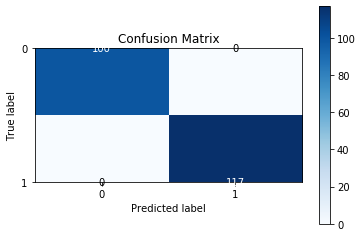

In [15]:
#using scikit-plot python package (https://github.com/reiinakano/scikit-plot) ... you need to install 
# pip install scikit-plot

skplt.metrics.plot_confusion_matrix(y_true=sms_labels, y_pred=predicted)
plt.show()

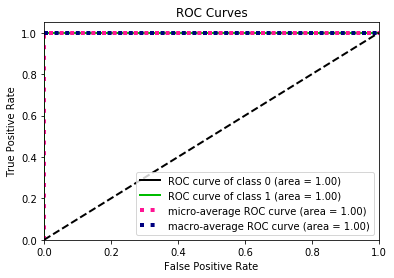

In [16]:
# true positive 
# false positive 

probas = nb.predict_proba(tfidf)
skplt.metrics.plot_roc(y_true=sms_labels, y_probas=probas)
plt.show()

The above ROC curve shows our Naive Bayesian classification model is almost perfect. 
Classify 99% of the reviews correctly

## Split validation

Training and Testing Sets
Like any other supervised machine learning problem, we need to divide our data into training and testing sets. To do so, we will use the train_test_split utility from the sklearn.model_selection library. Execute the following script:

I will build a predictive model using **x_train** and **y_train**, which are called as **training dataset**.

Then, we will apply the model to **x_test** and **y_test** (**testing dataset**) and this will tell us the performance or quality of the model

In [17]:
# Split validation
x_train, x_test, y_train, y_test = train_test_split(sms_data, sms_labels, test_size=0.3,random_state=0)
len(x_train), len(y_train), len(x_test), len(y_test)


(151, 151, 66, 66)

The above script divides data into 30% test set and 70% training set.

In [18]:
# transform training data using tfidf_vectorizer
X_train = tfidf_vectorizer.fit_transform(x_train)
X_test = tfidf_vectorizer.transform(x_test)
print(X_train[:2])
print("+++++++++++++++++++++++++++++++++++++++++")
print(X_test)



  (0, 696)	0.3937746926045103
  (0, 641)	0.3937746926045103
  (0, 117)	0.3937746926045103
  (0, 384)	0.3937746926045103
  (0, 714)	0.45262940894918285
  (0, 793)	0.4182016068969689
  (1, 821)	0.28543389845407213
  (1, 676)	0.3557159926298427
  (1, 223)	0.3557159926298427
  (1, 172)	0.25962552497704766
  (1, 722)	0.3246156705140006
  (1, 569)	0.3557159926298427
  (1, 633)	0.6050992816162862
+++++++++++++++++++++++++++++++++++++++++
  (0, 526)	0.2973971518899366
  (0, 289)	0.5221954696346857
  (0, 275)	0.5651844059865612
  (0, 196)	0.5651844059865612
  (1, 745)	0.5917060683336663
  (1, 431)	0.48999871367939807
  (1, 177)	0.45265063199428435
  (1, 6)	0.45265063199428435
  (2, 549)	0.344911287017707
  (2, 526)	0.2528259122488751
  (2, 355)	0.48047959479206487
  (2, 221)	0.4439334578142832
  (2, 219)	0.48047959479206487
  (2, 186)	0.39789077042986726
  (3, 614)	0.44367926772389643
  (3, 437)	0.41776421797923474
  (3, 403)	0.2457483235514701
  (3, 375)	0.41776421797923474
  (3, 289)	0.443679

In [19]:
# build naive baysian model for text classification & evaluation overall accuracy
nb = MultinomialNB().fit(X_train, y_train)
predicted = nb.predict(X_test)
np.mean(predicted == y_test)


0.9696969696969697

In [20]:
# Print different accuracy measures (confusion matrix)

print('\n overall accuracy:')
print(metrics.accuracy_score(y_test, predicted))

print('\n confusion_matrix:')
print(metrics.confusion_matrix(y_test, predicted))

print('\n Here is the classification report:')
print(metrics.classification_report(y_test, predicted))


 overall accuracy:
0.9696969696969697

 confusion_matrix:
[[27  2]
 [ 0 37]]

 Here is the classification report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        29
           1       0.95      1.00      0.97        37

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



I achieved 99.7% accuracy


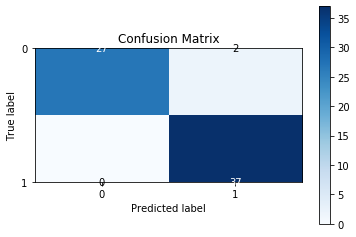

In [21]:
#using scikit-plot python package (https://github.com/reiinakano/scikit-plot) ... you need to install 
# pip install scikit-plot

skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=predicted)
plt.show()

### Summary of split validation:
* The accuracy of Naive Bayes-based model on this dataset was about 99.7%.

## Creating a Pipeline and Generating the Model
I will create a pipeline with three components: a cleaner, a vectorizer, and a classifier. The cleaner uses our predictors class object to clean and preprocess the text. The vectorizer uses countvector objects to create the bag of words matrix for our text. The classifier is an object that performs the logistic regression to classify the sentiments.




In [22]:
# combining feature engineering and model building
nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', MultinomialNB())])

In [23]:
nb_pipeline = nb_pipeline.fit(x_train, y_train)
nb_pipeline

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='ignore',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [24]:
predicted = nb_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.9848484848484849

In [25]:
# a complete pipeline

nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', MultinomialNB())])
nb_pipeline = nb_pipeline.fit(x_train, y_train)
predicted = nb_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.9848484848484849

Well, i got a classification rate of 99.7%, considered as good accuracy.

### kNeighbors Classifier (kNN)
Create KNN classifier object by passing argument number of neighbors in KNeighborsClassifier() function.
Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [26]:
knn_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', KNeighborsClassifier())])
knn_pipeline = knn_pipeline.fit(x_train, y_train)
predicted = knn_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.9242424242424242

Classification rate of 98%.

### Support Vector Machine (SVM)
- This is a binary classification problem and we will use SVM algorithm to solve this problem.

In [27]:
svm_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', SVC(kernel='linear', probability=True))])
svm_pipeline = svm_pipeline.fit(x_train, y_train)
predicted = svm_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.9848484848484849

- From the output, it can be seen that our model achieved an accuracy of 99.7%.
- This shows that SVM works best for this dataset. You can use this svm model for model deployment

In [30]:
# to figure out processing time

import timeit
start_time = timeit.default_timer()

svm_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', SVC(kernel='linear', probability=True))])
svm_pipeline = svm_pipeline.fit(x_train, y_train)
predicted = svm_pipeline.predict(x_test)
print(np.mean(predicted == y_test))

elapsed = timeit.default_timer() - start_time
print("%s %s" % ("this processing has taken", elapsed))

0.9848484848484849
this processing has taken 0.04549759999986236


## Improve my model and predictive the model 

### Using different parameter values (e.g., removing stopwords, using stemming words, using ngrams, removing too frequent words, removing too rare words), the model accuracy can be improved.

In [31]:
# NB removing stopwords & rare words

nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english', min_df=2)), ('clf', MultinomialNB())])
nb_pipeline = nb_pipeline.fit(x_train, y_train)
predicted = nb_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.9545454545454546

In [32]:
# removing stopwords

knn_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english')), ('clf', KNeighborsClassifier())])
knn_pipeline = knn_pipeline.fit(x_train, y_train)
predicted = knn_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.8484848484848485

In [33]:
# SVM removing stopwords

svm_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english')), ('clf', SVC(kernel='linear', probability=True))])
svm_pipeline = svm_pipeline.fit(x_train, y_train)
predicted = svm_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.9696969696969697

In [34]:
# KNN removing stopwords & using bigram as well

knn_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english', ngram_range=(1, 2))), ('clf', KNeighborsClassifier())])
knn_pipeline = knn_pipeline.fit(x_train, y_train)
predicted = knn_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.8484848484848485

In [35]:
#SVm removing stopwords & using bigram as well
svm_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english', ngram_range=(1, 2))), ('clf', SVC(kernel='linear', probability=True))])
svm_pipeline = svm_pipeline.fit(x_train, y_train)
predicted = svm_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.9545454545454546

It looks like the best model uses **TFIDF (and bigram) with SVM after removing stopwords**

### Pipeline with multiple classifiers (or algorithms)
- Then, can we test the accuracy of all classifiers at once?

In [36]:
classifiers = [MultinomialNB(), KNeighborsClassifier(), SVC(kernel='linear', probability=True)]

In [37]:
for clf in classifiers:
    pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english', ngram_range=(1, 2))), 
                         ('clf', clf)])
    classifiers_pipeline = pipeline.fit(x_train, y_train)
    predicted = classifiers_pipeline.predict(x_test)
    print("%s --> %s" % (clf, np.mean(predicted == y_test)))
    print(" ++++++++++++++++++++++++++++++++++++++++++++++++++++++++ ")

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) --> 0.9696969696969697
 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') --> 0.8484848484848485
 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False) --> 0.9545454545454546
 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 


## A k-fold Cross validation (CV) 
Of course, scoring ourselves on the training set is not useful. Let’s do some K-fold cross-validation to get an idea of how well we would do with unseen data.
### 10-fold CV rather than testing the model quality **only once**, cross validation (or 10-fold CV) tests the model **10 times** with 10 different testing datasets.


In [38]:
# use nb
from sklearn.ensemble import StackingClassifier
nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english')), ('clf', MultinomialNB())])
nb_pipeline = nb_pipeline.fit(sms_data, sms_labels)

scores = cross_val_score(nb_pipeline, sms_data, sms_labels, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[1.         1.         0.90909091 0.95454545 0.90909091 0.81818182
 1.         1.         1.         1.        ]
0.9590909090909092


In [39]:
scores.mean()

0.9590909090909092

The mean value is 0.9859, or 98.59%.

In [40]:
# use knn

knn_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english')), ('clf', KNeighborsClassifier())])
knn_pipeline = knn_pipeline.fit(sms_data, sms_labels)

scores = cross_val_score(knn_pipeline, sms_data, sms_labels, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())



[0.90909091 0.90909091 0.90909091 0.95454545 0.81818182 0.81818182
 0.95454545 0.95238095 1.         0.9047619 ]
0.9129870129870131


In [41]:
import timeit
start_time = timeit.default_timer()

svm_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english', ngram_range=(1, 2))), ('clf', SVC(kernel='linear', probability=True))])
svm_pipeline = svm_pipeline.fit(sms_data, sms_labels)

scores = cross_val_score(svm_pipeline, sms_data, sms_labels, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

elapsed = timeit.default_timer() - start_time
print("%s %s" % ("this processing has taken", elapsed))

[1.         1.         1.         0.95454545 0.81818182 0.86363636
 1.         1.         1.         1.        ]
0.9636363636363636
this processing has taken 0.5516307000000324


In [42]:
scores.std()

0.06363636363636363

The result is: 0.0409 which is 4.09%. This is extremely low, which means that our model has a very low variance, which is actually very good since that means that the prediction that we obtained on one test set is not by chance. Rather, the model will perform more or less similar on all test sets.

This process has taken 72 seconds in my machine. 

##  Grid Search 


In [43]:
nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english')), ('clf', MultinomialNB())])

In [44]:
parameters = {'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
              'tfidf__min_df': [1, 2, 5],
              'tfidf__max_df': [0.9, 0.8, 0.7],
              'clf__alpha': (0.01, 0.001, 1),
}

In [45]:

gs_clf = GridSearchCV(nb_pipeline, parameters)
gs_clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='ignore',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                      

In [48]:
gs_clf.best_score_

0.9541935483870969

In [49]:
for param_name in sorted(parameters.keys()):
    print(("%s: %r" % (param_name, gs_clf.best_params_[param_name])))

clf__alpha: 0.01
tfidf__max_df: 0.9
tfidf__min_df: 1
tfidf__ngram_range: (1, 1)


Now, we can use the best model recommended by gridsearch.

In [50]:
# split validation

nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error='ignore', stop_words='english', min_df=1, 
                                                  ngram_range=(1,2), max_df=0.9)), 
                        ('clf', MultinomialNB(alpha=0.01))])
nb_pipeline = nb_pipeline.fit(x_train, y_train)
predicted = nb_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.9696969696969697

The last and final step of Grid Search algorithm is to find the accuracy obtained using the best parameters. Previously i had a mean accuracy of 98.59% 

## scikit-learn classifier (Naive Bayes) 

In [51]:
# since we know the parameters for the best NB model, let's initialize TfidfVectorizer again

tfidf_vectorizer = TfidfVectorizer(decode_error='ignore', stop_words='english', min_df=1, ngram_range=(1,2), max_df=0.9)

In [52]:
# split validation again

x_train, x_test, y_train, y_test = train_test_split(sms_data, sms_labels, test_size=0.3, random_state=0)
len(x_train), len(y_train), len(x_test), len(y_test)

(151, 151, 66, 66)

In [53]:
# transform traing data and testing data to tfidf format 

X_train = tfidf_vectorizer.fit_transform(x_train)
X_test = tfidf_vectorizer.transform(x_test)

In [54]:
# now we have more vectors due to bi-grams
print(X_train.shape)
print(X_test.shape)

(151, 1886)
(66, 1886)


In [55]:
print(tfidf_vectorizer.get_feature_names()[0:5])
print(tfidf_vectorizer.get_feature_names()[-5:])

['077', '077 666', '100', '100 gender', '100k']
['year strategy', 'yes', 'yes things', 'younger', 'younger workers']


In [56]:
nb = MultinomialNB().fit(X_train, y_train)

predicted = nb.predict(X_test)
np.mean(predicted == y_test)

0.9696969696969697

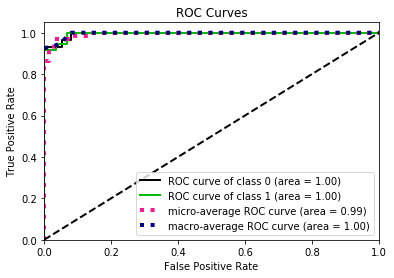

In [57]:
probas = nb.predict_proba(X_test)
skplt.metrics.plot_roc(y_true=y_test, y_probas=probas)
plt.show()

In [59]:
#https://stackoverflow.com/questions/26976362/how-to-get-most-informative-features-for-scikit-learn-classifier-for-different-c

def most_informative_feature_for_binanry_classification(vectorizer, classifier, n=50):
    
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print((class_labels[0], coef, feat))

    print("=========================================")

    for coef, feat in reversed(topn_class2):
        print((class_labels[1], coef, feat))


most_informative_feature_for_binanry_classification(tfidf_vectorizer, nb, n=10)

('0', -7.689104593737298, '077')
('0', -7.689104593737298, '077 666')
('0', -7.689104593737298, '120')
('0', -7.689104593737298, '120 minutes')
('0', -7.689104593737298, '170')
('0', -7.689104593737298, '170 minutes')
('0', -7.689104593737298, '342')
('0', -7.689104593737298, '342 077')
('0', -7.689104593737298, '43')
('0', -7.689104593737298, '43 miles')
('1', -6.395168681257706, 'coronavirus')
('1', -6.527998289826769, 'remote')
('1', -6.550671876578896, 'workers')
('1', -6.563551407510135, 'says')
('1', -6.694746359103001, 'pay')
('1', -6.721870338491834, 'cir')
('1', -6.723376728086348, 'work')
('1', -6.738521127155324, 'gm')
('1', -6.7623563976730185, 'remote work')
('1', -6.767056321012385, 'employers')


It appears **HR** reviews tend to contain such terms as **workers, hire, paid leave, employe, ... **

- Explain about your best model (e.g., algorithm, parameters)
Split the dataset by using the function train_test_split(). you need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.
Generating Model
Let's build support vector machine model. First, import the SVM module and create support vector classifier object by passing argument kernel as the linear kernel in SVC() function.
Then, fit your model on train set using fit() and perform prediction on the test set using predict().
Evaluating the Model
Let's estimate how accurately the classifier or model can predict the negative or positive reviews.
Well, you got a classification rate of 99.7%, considered as very good accuracy.
Advantages
SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm. They also use less memory because they use a subset of training points in the decision phase. 
Disadvantages
SVM is not suitable for large datasets because of its high training time and it also takes more time in training compared to Naïve Bayes. It works poorly with overlapping classes and is also sensitive to the type of kernel used.

## Fourth, applying your best model to a new (unlabeled) dataset:small dataset (10 to 20 news articles) containing texts only (without labels):

load dataset

In [60]:
# first column
docs_new = []
openfile = open('..//TextClassification/soumana.csv', 'r')
r = csv.reader(openfile)
for i in r: 
    docs_new.append(i[0])
openfile.close()

In [61]:
docs_new

['ï»¿"CVS eyes virtual interviews',
 'EEOC: Manufacturer violated ADA in firing worker returning from hospitalization',
 'Employees confident they can do their jobs effectively from home during COVID-19 pandemic',
 'Court revives coachs suit, citing need to consider the overall likelihood of discrimination',
 'From manufacturing to HR: One womans journey through Honda',
 'NLRB suspends representation elections due to coronavirus',
 'Free trainings, resources aim to ease the transition to remote work',
 '5 things to know about the new coronavirus paid leave law',
 'Soft skills training is a priority, but lack of time and resources stands in the way',
 'Metals company settles EEOC claim it refused to hire workers over 40',
 'DOL to observe 30-day temporary non-enforcement of coronavirus paid leave law',
 'McDonalds names new chief people officer',
 'Employers can screen workers, applicants for fevers, EEOC says',
 'Collaborative apps boost remote work productivity but cause distractions'

In [62]:


#unlabeled_tfidf = tfidf_vectorizer.transform(docs_new)
predicted = svm_pipeline.predict(docs_new)

for doc, category in zip(docs_new, predicted):
    print(('%r => %s' % (doc, category)))

'ï»¿"CVS eyes virtual interviews' => 0
'EEOC: Manufacturer violated ADA in firing worker returning from hospitalization' => 1
'Employees confident they can do their jobs effectively from home during COVID-19 pandemic' => 1
'Court revives coachs suit, citing need to consider the overall likelihood of discrimination' => 1
'From manufacturing to HR: One womans journey through Honda' => 1
'NLRB suspends representation elections due to coronavirus' => 1
'Free trainings, resources aim to ease the transition to remote work' => 1
'5 things to know about the new coronavirus paid leave law' => 1
'Soft skills training is a priority, but lack of time and resources stands in the way' => 1
'Metals company settles EEOC claim it refused to hire workers over 40' => 1
'DOL to observe 30-day temporary non-enforcement of coronavirus paid leave law' => 1
'McDonalds names new chief people officer' => 1
'Employers can screen workers, applicants for fevers, EEOC says' => 1
'Collaborative apps boost remote wor

In [63]:
#let's find the probability

predicted_prob = svm_pipeline.predict_proba(docs_new)

for doc, category in zip(docs_new, predicted_prob):
    print(('%s => %s' % (doc, (category))))

ï»¿"CVS eyes virtual interviews => [0.8933652 0.1066348]
EEOC: Manufacturer violated ADA in firing worker returning from hospitalization => [1.39792262e-05 9.99986021e-01]
Employees confident they can do their jobs effectively from home during COVID-19 pandemic => [1.43757339e-09 9.99999999e-01]
Court revives coachs suit, citing need to consider the overall likelihood of discrimination => [0.00829435 0.99170565]
From manufacturing to HR: One womans journey through Honda => [0.09981489 0.90018511]
NLRB suspends representation elections due to coronavirus => [2.9256289e-13 1.0000000e+00]
Free trainings, resources aim to ease the transition to remote work => [4.36737778e-09 9.99999996e-01]
5 things to know about the new coronavirus paid leave law => [4.55926092e-08 9.99999954e-01]
Soft skills training is a priority, but lack of time and resources stands in the way => [0.058048 0.941952]
Metals company settles EEOC claim it refused to hire workers over 40 => [2.44162602e-08 9.99999976e-01]

In [84]:
tfidf_vectorizer = TfidfVectorizer(decode_error ='ignore')
tfidf = tfidf_vectorizer.fit_transform(docs_new)
print(tfidf.shape)
print(tfidf)

(20, 1523)
  (0, 701)	0.5324019036382707
  (0, 1443)	0.5324019036382707
  (0, 469)	0.3868392935148088
  (0, 320)	0.5324019036382707
  (1, 642)	0.34914886471876844
  (1, 545)	0.18147637899500693
  (1, 1107)	0.34914886471876844
  (1, 1500)	0.34914886471876844
  (1, 511)	0.34914886471876844
  (1, 671)	0.19245291895408312
  (1, 39)	0.34914886471876844
  (1, 1441)	0.34914886471876844
  (1, 821)	0.34914886471876844
  (1, 411)	0.27693625568364877
  (2, 968)	0.3131280820217139
  (2, 3)	0.3131280820217139
  (2, 303)	0.3131280820217139
  (2, 398)	0.22751655319254135
  (2, 635)	0.27524437700919485
  (2, 414)	0.3131280820217139
  (2, 724)	0.3131280820217139
  (2, 1333)	0.2104817555320658
  (2, 372)	0.19607903932967125
  (2, 194)	0.19607903932967125
  (2, 1339)	0.19607903932967125
  :	:
  (19, 1247)	0.020737038221248165
  (19, 358)	0.022981267820847803
  (19, 82)	0.022981267820847803
  (19, 191)	0.07598511401988481
  (19, 524)	0.07664872327503107
  (19, 1141)	0.020737038221248165
  (19, 978)	0.0207

In [85]:
tfidf_vectorizer.get_feature_names()[0:10]

['10', '12', '1799', '19', '1930s', '1950s', '1960s', '1969', '1994', '1997']

In [86]:
tfidf_vectorizer.get_feature_names()[-10:]

['year',
 'years',
 'yes',
 'yet',
 'ying',
 'york',
 'you',
 'young',
 'youngest',
 'your']

In [87]:
tfidf_matrix = tfidf_vectorizer.fit_transform(docs_new).toarray()
tfidf_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.01455286, 0.        , ..., 0.        , 0.        ,
        0.021148  ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.03560784],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [88]:
# Document Term Matrix
pd.DataFrame(tfidf_matrix,index=docs_new,columns=tfidf_vectorizer.get_feature_names()).head()

,10,12,1799,19,1930s,1950s,1960s,1969,1994,1997,...,year,years,yes,yet,ying,york,you,young,youngest,your
"ï»¿""CVS eyes virtual interviews",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EEOC: Manufacturer violated ADA in firing worker returning from hospitalization,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Employees confident they can do their jobs effectively from home during COVID-19 pandemic,0.0,0.0,0.0,0.313128,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Court revives coachs suit, citing need to consider the overall likelihood of discrimination",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
From manufacturing to HR: One womans journey through Honda,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
#SVm removing stopwords & using bigram as well
svm_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english', ngram_range=(1, 2))), ('clf', SVC(kernel='linear', probability=True))])
svm_pipeline = svm_pipeline.fit(x_train, y_train)
predicted = svm_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.9545454545454546

In [90]:
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[27  2]
 [ 1 36]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        29
           1       0.95      0.97      0.96        37

    accuracy                           0.95        66
   macro avg       0.96      0.95      0.95        66
weighted avg       0.95      0.95      0.95        66



In [92]:
feature_names = tfidf_vectorizer.get_feature_names()
for i in feature_names[:10]:
    print(i)

10
12
1799
19
1930s
1950s
1960s
1969
1994
1997


In [93]:
#https://stackoverflow.com/questions/26976362/how-to-get-most-informative-features-for-scikit-learn-classifier-for-different-c

def most_informative_feature_for_binanry_classification(vectorizer, classifier, n=50):
    
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print((class_labels[0], coef, feat))

    print("=========================================")

    for coef, feat in reversed(topn_class2):
        print((class_labels[1], coef, feat))


most_informative_feature_for_binanry_classification(tfidf_vectorizer, nb, n=10)

('0', -7.689104593737298, '10')
('0', -7.689104593737298, '12')
('0', -7.689104593737298, '1994')
('0', -7.689104593737298, '1997')
('0', -7.689104593737298, '1998')
('0', -7.689104593737298, '1999')
('0', -7.689104593737298, '_too_')
('0', -7.689104593737298, 'able')
('0', -7.689104593737298, 'accept')
('0', -7.689104593737298, 'accolades')
('1', -6.395168681257706, 'directed')
('1', -6.527998289826769, 'ventura')
('1', -6.563551407510135, 'will')
('1', -6.694746359103001, 'storyline')
('1', -6.721870338491834, 'content')
('1', -6.738521127155324, 'karate')
('1', -6.7623563976730185, 'veteran')
('1', -6.767056321012385, 'flick')
('1', -6.810558980298979, 'glass')
('1', -6.839012004938961, 'convince')


## Fifth “storytelling”.

The objective of this homework is To build a text classification (or predictive) model, that contains texts (news articles) and labels (either HR[1] or non-HR[0]). 
Based on reviews analysis whether it is HR or NON-HR by the used of sentence-level classification.
Specifically, it aims to:apply sklearn, NLP, classifier,the Naive Bayes algorithm KNN and SVM
 Support Vector Machines Algorithm
The Support Vector Machines algorithm verifies to be the utmost effective among three (3) algorithms (k-nearest neighbors , Naïve Bayes and Support Vector Machines) for classification of text of review mining.
The performance of classification approaches can be created out by using the following metrics: (1) recall is the
count of true positive and describes as the proportion of correct instances that classified as the given class over the
number of actual total in that class; (2) precision describes as the ratio of the correctly classified over number of the all experimental classifications; while (3) F-Measure is the combined portion for precision and recall.


This this homework is To build a text classification (or predictive) model, that contains texts (news articles) and labels (either HR[1] or non-HR[0]). 
reviews from https://www.hrdive.com/ and movie reviews from IMDB.com. 
It uses algorithm such as Support Vector Machines algorithm to categorize the review as HR, or NON-HR. 
This module contains texts (news articles) and labels (either HR[1] or non-HR[0]) word lists which will be saved in the two (2) separate text file and later it will be used for the reviews analysis.
 - Training Data
The sentences were further processed to remove stop words (Common words that have a little value in the “a”,
“ay” “the”,”ang”) and stemming (words that carry
similar meanings, but in different grammatical forms such as “runner”, and “running” was combine into one
word “run”) was applied also in the sentence preprocessing.
 - Support Vector Machines Classifier
Support Vector Machines classifier algorithm is created on applying SVC’ theorem. Document analysis and text
classification are around of the applications of this set of rules.

Methodology of text classification (or predictive) model
 - Data gathering
were extractied reviews from https://www.hrdive.com/ and movie reviews from IMDB.com.There were
2653 movies reviews and HR articles 
  Measures and Analysis
The effectiveness of the web reviews analysis was evaluated based on accuracy, precision, recall and F-score.
Accuracy is the total correctness of the classification . An accuracy of one-hundred percent (99.7%)
means that the predicted instances are precisely the same as the actual instances.
- The 769 sample reviews or (30%) were randomly picked. To determine the numerical findings of the result per metric.
- 143 positive reviews correctly predicted as positive & 0 false positive ==> This indicates that you would expect some neutral in the review. 
- 624 negative reviews correctly as negative & 2 false negative ==> This indicates that you would expect some neutral in the review.


 overall accuracy:
0.9973992197659298

 confusion_matrix:
[624   2]
 [  0 143]

 Here is the classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       626
           1       0.99      1.00      0.99       143

    accuracy                           1.00       769
   macro avg       0.99      1.00      1.00       769
weighted avg       1.00      1.00      1.00       769

- I achieved 99.7% accuracy

 - Limitations.
My machine learning model did not take much time to execute. One of the reasons for the quick training time is the fact that i had a relatively smaller training set. I had 2653 documents, of which we used 70% (1764) for training. However, in real-world scenarios, there can be millions of documents. In such cases, it can take hours or even days  to train the algorithms. Therefore.

## Neural Network2 (NN)

In [59]:
from sklearn.neural_network import MLPClassifier
# build naive baysian model for text classification & evaluation overall accuracy
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train, y_train)
predicted = mlp.predict(X_test)
np.mean(predicted == y_test)

0.9973992197659298

In [62]:
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[624   2]
 [  0 143]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       626
           1       0.99      1.00      0.99       143

    accuracy                           1.00       769
   macro avg       0.99      1.00      1.00       769
weighted avg       1.00      1.00      1.00       769



To summarize the confusion matrix : TRUE POSITIVES (TP)= 2,TRUE NEGATIVES (TN)= 624,FALSE POSITIVES (FP)= 0, FALSE NEGATIVES (FN)= 143